In [ ]:
%%javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}setInterval(ClickConnect,60000)

<IPython.core.display.Javascript object>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.4MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 194kB 14.0MB/s 
     |████████████████████████████████| 1.2MB 27.3MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
!pwd

/content


In [ ]:
doc(download_images)

In [ ]:
!ls '/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/img'

In [ ]:
data_path = Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data')

In [ ]:
list(data_path.glob('**/*'))

[Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/img'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/boeing_737.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/boeing_747.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/boeing_767.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/boeing_777.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/boeing_787.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/airbus_A320.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/airbus_A330.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/airbus_A350.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/da

In [ ]:
df = pd.read_csv(data_path/'links/boeing_787.csv')

In [ ]:
df.head(5)

,height,image,source,thumbnail,title,url,width
0,802,https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Boeing_787_N1015B_ANA_Airlines_(27611880663)_(cropped).jpg/1200px-Boeing_787_N1015B_ANA_Airlines_(27611880663)_(cropped).jpg,Bing,https://tse2.mm.bing.net/th?id=OIP.gz384duyg-4ujWDw7nT6nAHaE8&pid=Api,Boeing 787 Dreamliner - Wikipedia,https://en.wikipedia.org/wiki/Boeing_787_Dreamliner,1200
1,1067,http://www.airlinereporter.com/wp-content/uploads/2012/08/IMG_8179.jpg,Bing,https://tse3.mm.bing.net/th?id=OIP.M3xhl8aTbIz2fQT0jsiOKgHaE8&pid=Api,Interior Photo Tour of ANA's First Boeing 787 Dreamliner ...,http://www.airlinereporter.com/2011/08/interior-photo-tour-of-anas-first-boeing-787-dreamliner/,1600
2,800,https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/All_Nippon_Airways_Boeing_787-8_Dreamliner_JA801A_OKJ_in_flight.jpg/1200px-All_Nippon_Airways_Boeing_787-8_Dreamliner_JA801A_OKJ_in_flight.jpg,Bing,https://tse4.mm.bing.net/th?id=OIP.E-PVtUeyqEMfYWzVoVnKVgHaE8&pid=Api,Boeing 787 Dreamliner - Wikipedia,https://en.wikipedia.org/wiki/Boeing_787_Dreamliner,1200
3,2640,https://www.wired.com/wp-content/uploads/images_blogs/autopia/2010/06/K64962-152.jpg,Bing,https://tse4.mm.bing.net/th?id=OIP.QY5lGGpMdvMi95YnJvnVcQHaF7&pid=Api,Boeing 787 Withstands Lightning Strike | WIRED,https://www.wired.com/2010/06/boeing-787-withstands-lightning-strike/,3300
4,2400,http://www.airlinereporter.com/wp-content/uploads/2011/11/ZA003a.jpg,Bing,https://tse1.mm.bing.net/th?id=OIP.6uDlfnq6TmD8pQgAc0NSGQHaE8&pid=Api,An Inside Look at the Third 787 Dreamliner's New Interior ...,https://www.airlinereporter.com/2011/11/an-inside-look-at-boeings-third-787-dreamliner-za003/,3600


In [44]:
# for img_url in df['thumbnail']:
img_response = requests.get('https://tse2.mm.bing.net/th?id=OIP.gz384duyg-4ujWDw7nT6nAHaE8&pid=Api')
with open('test_image.jpg', 'wb') as img_file:
  img_file.write(img_response.content)

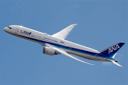

In [51]:
Image.open('test_image.jpg').to_thumb(128, 128)

In [79]:
local_data_path = Path('data')
boeing_787_path = Path(local_data_path/'b_787')
boeing_787_path.mkdir(parents=True, exist_ok=True)

In [66]:
import uuid

uuid.uuid4().hex

'7113aaf1c8bd4777a86ba63be4a7b0cc'

In [77]:
for url in df['thumbnail']:
  img_response = requests.get(url)
  with open(boeing_787_path/(uuid.uuid4().hex + '.jpg'), 'wb') as img_file:
    img_file.write(img_response.content)

In [83]:
list(Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links').glob('*.csv'))

[Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/boeing_737.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/boeing_747.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/boeing_767.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/boeing_777.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/boeing_787.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/airbus_A320.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/airbus_A330.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/airbus_A350.csv'),
 Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links/airbus_A380.csv')]

In [98]:
local_data_path = Path('data')
for csv_file_path in Path('/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/links').glob('*.csv'):
  # read .csv file with urls to thumbnails
  file_name = csv_file_path.name[:-4]
  df_links = pd.read_csv(csv_file_path)
  # request and save response to local dir
  local_img_data_path = local_data_path/file_name
  local_img_data_path.mkdir(parents=True, exist_ok=True)
  for url in df_links['thumbnail']:
    img_response = requests.get(url)
    with open(local_img_data_path/(uuid.uuid4().hex + '.jpg'), 'wb') as img_file:
      img_file.write(img_response.content)

In [92]:
!du -h b_787/

24M	b_787/


In [97]:
!ls 

b_787  data  gdrive  sample_data


In [95]:
# !rm -r data/*

In [99]:
!cp -r /content/data/ '/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data'